#Reconhecimento de Entidades Nomeadas

Este projeto de processamento de linguagem natural visa utilizar a técnica de Named Entity Recognition em um conjunto de dados de diálogos do jogo The Last Of Us. Os principais objetivos deste projeto são construir um grafo que represente as relações entre os personagens nos diálogos e analisar as métricas do grafo. Ao fazer isso, o projeto busca fornecer informações valiosas sobre as relações entre os personagens e sua evolução ao longo da história. A técnica de Named Entity Recognition permitirá a identificação de entidades importantes, como nomes, locais e organizações, que serão cruciais na construção do gráfico e na análise das métricas.

## Preparando o dataset para realizar anlise de Reconhecimento de Entidades Nomeadas

In [ ]:
!pip install requests        #for web requests
!pip install beautifulsoup4  #for web scraping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

print(len(stopwords))
print(stopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
  stop_words = stopwords.words('english')
  # Remove stop words
  tokens = [token for token in text.split() if token.lower() not in stop_words]
  # Join not removed words
  text_clean = ' '.join(tokens)
  return text_clean

In [ ]:
from bs4 import BeautifulSoup
import requests

#Source for TLoU 1 script: "https://gamefaqs.gamespot.com/ps3/652686-the-last-of-us/faqs/68485" Last access: 04/08/2023 MM/DD/YYYY
target_url = "https://drive.google.com/uc?id=1jYsssW5BYiNcgm_n948LtxF9skgwWMNS&export=download"
response = requests.get(target_url)
tlou1_script = response.content.decode('utf-8')
print(tlou1_script[:1698])



    _____ _   _ _____   _          ____ _____   _____ _____   _   _ ____
   |_   _| | | |  ___| | |    /¯\ |  __|_   _| |     |  ___| | | | |  __|
     | | | |_| | |_    | |   /   \| |__  | |   | (¯) | |_    | | | | |__
     | | |  _  |  _|   | |  ( (¯) )__  | | |   | | | |  _|   | | | |__  |
     | | | | | | |___  | |__|  ¯  |__| | | |   | (_) | |     | |_| |__| |
     |_| |_| |_|_____| |____|_|¯|_|____| |_|   |_____|_|     |_____|____|
 Game Script by Shotgunnova (P. Summers) / Email: shotgunnova(a+)gmail(d0t)com


   01) Prologue - Hometown ............................................. GS01
   02) Summer - The Quarantine Zone .................................... GS02
   03) Summer - The Outskirts .......................................... GS03
   04) Summer - Bill's Town ............................................ GS04
   05) Summer - Pittsburgh ............................................. GS05
   06) Summer - The Suburbs ............................................ GS06
   07) 

Obtendo os nomes dos capítulos

In [ ]:
import re
tlou1_chapters_name = []
for chap_name in re.findall("\d*\).*\s\.", tlou1_script):
  tlou1_chapters_name.append(chap_name[:len(chap_name)-2])

for i in range(2): tlou1_chapters_name.pop(-1)

print(tlou1_chapters_name)

['01) Prologue - Hometown', '02) Summer - The Quarantine Zone', '03) Summer - The Outskirts', "04) Summer - Bill's Town", '05) Summer - Pittsburgh', '06) Summer - The Suburbs', "07) Fall - Tommy's Dam", '08) Fall - The University', '09) Winter - Lakeside Resort', '10) Spring - Bus Depot', '11) Spring - The Firefly Lab', '12) Epilogue - Jackson']


In [ ]:
tlou1_chap_text = []

tmp = tlou1_script[tlou1_script.index("_______________________________________________________________________________"):]

for i in range(len(tlou1_chapters_name)):
  index = tmp.index(tlou1_chapters_name[i][:3])
  if(i == len(tlou1_chapters_name)-1):
    tlou1_chap_text.append(tmp[index:tlou1_script.index("13.")])
  else:
    tlou1_chap_text.append(tmp[index:tmp.index(tlou1_chapters_name[i+1][:3])])

print(tlou1_chap_text)

['01) HOMETOWN                                                  [PROLOGUE] [GS01]\n_______________________________________________________________________________\n¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n\n[Setting: Texas. Joel walks into his house late at night, on the phone.]\n\nJoel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\n      can\'t lose this job. I understand... Let\'s talk about this in the\n      morning, okay? We\'ll talk about it in the morning. Alright, goodnight.\n\n[He turns on the light, waking his daughter on the couch.]\n\nSarah: Hey.\n\nJoel: Scoot.\n\nSarah: Fun day at work, huh?\n\nJoel: What are you still doing up? It\'s late.\n\nSarah: Oh crud. What time is it?\n\nJoel: It\'s way past your bedtime.\n\nSarah: But it\'s still today.\n\nJoel: Honey, please not right now. I do not have the energy for this.\n\n[She gets out a small gift box from nearby.]\n\nSarah: Here.\n\nJoel: What\'s this?\n\nSa

Removendo descrições das cenas.

In [ ]:
# Define the regular expression pattern
pattern = r"\[.*?\]"

# Remove text between square brackets in each string of the list
clean_dialogues = [re.sub(pattern, "", d).strip() for d in tlou1_chap_text]

clean_dialogues

['01) HOMETOWN                                                   \n_______________________________________________________________________________\n¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n\n\n\nJoel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\n      can\'t lose this job. I understand... Let\'s talk about this in the\n      morning, okay? We\'ll talk about it in the morning. Alright, goodnight.\n\n\n\nSarah: Hey.\n\nJoel: Scoot.\n\nSarah: Fun day at work, huh?\n\nJoel: What are you still doing up? It\'s late.\n\nSarah: Oh crud. What time is it?\n\nJoel: It\'s way past your bedtime.\n\nSarah: But it\'s still today.\n\nJoel: Honey, please not right now. I do not have the energy for this.\n\n\n\nSarah: Here.\n\nJoel: What\'s this?\n\nSarah: Your birthday.\n\n\n\nSarah: You kept complaining about your broken watch... So I figured, you know.\n       You like it?\n\nJoel: Honey, this is...\n\nSarah: What?\n\nJoel: It\'s nice,

Obtendo lista de personagens

In [ ]:
tlou1_characters = []

for character in re.findall("\n\n.*:", tlou1_script):
  if(character[2:character.index(":")] not in tlou1_characters):
    tlou1_characters.append(character[2:character.index(":")])

tlou1_characters.pop(-1)

print(tlou1_characters)
print(len(tlou1_characters))

['[Setting', 'Joel', 'Sarah', 'Tommy', 'Reporter', 'Cop', 'Passerby', 'Motorist', 'Soldier', 'Clip', 'Tess', 'Loudspeaker', 'Man', 'Woman', 'Guard', 'Guard 2', 'Infected', '[If Joel puts him out of his misery', '[If Joel leaves him be', 'System', 'Terence', 'Malick', 'Goon', 'Goon 2', 'Goon 3', 'Sentry', 'Sentry 2', 'Sentry 3', 'Sentry 4', 'Robert', 'Voice', 'Marlene', 'Voice 2', 'Voice 1', 'Girl', 'Ellie', 'Patrol', 'Patrol 2', 'Soldier 2', 'Radio', 'Bill', 'Hunter', 'Hunter 2', 'Hunter 3', 'Hunter 4', 'Hunter 3 ', 'Hunter 5', 'Dying Woman', 'Kid', 'Henry', 'Sam', 'Maria', 'Earl', 'Man 2', 'Man 3', 'Man 4', '[They find the source of the noise', 'David', 'James', 'Hunter 6', 'Hunter 7', 'Hunter 8', 'Hunter 9', 'Hunter 10', 'Female Hunter', "[He sees what's got her so wide-eyed", 'Firefly', 'Firefly 2', 'Firefly 3', 'Nurse', 'Doctor', 'Doctor 2', 'Firefly 4', 'Firefly 5', 'Firefly 6', 'Firefly 7', 'Firefly 8', 'Firefly 9']
78


Preparando e alocando os dados em um dataframe para realizar a analise NER

In [ ]:
import pandas as pd

data = []

# Iterate over the list of dialogue strings
for dialogue in clean_dialogues:
    # Split the dialogue string into separate lines
    lines = dialogue.split('\n')
    # Get the chapter number and name from the first line
    chapter = lines[0].split(') ')[1]
    # Keep track of the current character and dialogue text
    current_character = None
    current_dialogue = ''
    # Process each line of the dialogue
    for line in lines[3:]:
        # If the line contains a character name, store the current dialogue and start a new one
        if ':' in line:
            # If there was already a character being processed, append the dialogue to the data list
            if current_character is not None:
                data.append([chapter, current_character, current_dialogue.strip()])
            # Start processing the new character and dialogue
            current_character = line.split(':')[0]
            current_dialogue = line.split(':')[1].strip()
        # If the line does not contain a character name, append it to the current dialogue
        else:
            current_dialogue += ' ' + line.strip()
    # Append the final dialogue for the last character in the chapter
    if current_character is not None:
        data.append([chapter, current_character, current_dialogue.strip()])

# Create a Pandas DataFrame from the list of data
df = pd.DataFrame(data, columns=['Chapter', 'Character', 'Dialogue'])

In [ ]:
#Deletando a ultima linha (não há entidades relevantes e contém lixo que pode atrapalhar a analise)
df = df.drop(df.index[-1])

#Removendo espaço extra dos nomes dos capitulos
df['Chapter'] = df['Chapter'].apply(lambda x: x.strip())

df

,Chapter,Character,Dialogue
0,HOMETOWN,Joel,"Tommy, I-...Tommy. Tommy, listen to me. He's t..."
1,HOMETOWN,Sarah,Hey.
2,HOMETOWN,Joel,Scoot.
3,HOMETOWN,Sarah,"Fun day at work, huh?"
4,HOMETOWN,Joel,What are you still doing up? It's late.
...,...,...,...
3410,JACKSON,Joel,None of that is on you.
3411,JACKSON,Ellie,"No, you don't understand."
3412,JACKSON,Joel,I struggled for a long time with survivin'. An...
3413,JACKSON,Ellie,Swear to me. Swear to me that everything you s...


Contando o número de dialogos por capitulos

In [ ]:
# Group the DataFrame by chapters and count the number of dialogues per chapter
dialogues_per_chapter = df.groupby('Chapter')['Dialogue'].count()
print(dialogues_per_chapter)

Chapter
BILL'S TOWN            504
BUS DEPOT              114
HOMETOWN               190
JACKSON                 18
LAKESIDE RESORT        265
PITTSBURGH             580
THE FIREFLY LAB         78
THE OUTSKIRTS          408
THE QUARANTINE ZONE    406
THE SUBURBS            338
THE UNIVERSITY         185
TOMMY'S DAM            329
Name: Dialogue, dtype: int64


Testando a filtragem do dataframe por capitulo

In [ ]:
# Filter the dataframe by chapter
hometown_df = df[df['Chapter'] == 'HOMETOWN']
hometown_df

,Chapter,Character,Dialogue
0,HOMETOWN,Joel,"Tommy, I-...Tommy. Tommy, listen to me. He's t..."
1,HOMETOWN,Sarah,Hey.
2,HOMETOWN,Joel,Scoot.
3,HOMETOWN,Sarah,"Fun day at work, huh?"
4,HOMETOWN,Joel,What are you still doing up? It's late.
...,...,...,...
185,HOMETOWN,Tommy,"Oh, no..."
186,HOMETOWN,Joel,"Sarah! Okay. Move your hands, baby."
187,HOMETOWN,Joel,"I know, baby. I know..."
188,HOMETOWN,Joel,"Listen to me, I know this hurts, baby. You're ..."


#Aplicando técnicas NER

Baixando e importando o modelo Spacy transformer

In [ ]:
!python -m spacy download en_core_web_trf

2023-05-01 01:02:28.610223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
import spacy
import spacy_transformers

nlp = spacy.load("en_core_web_trf")

In [ ]:
def extract_named_entities_from_character(df, character, chapter, types_entities):
    # Filtra o DataFrame pelas falas do personagem especificado no episódio especificado
    filtered_df = df[(df['Chapter'] == chapter) & (df['Character'] == character)]
    
    # Extrai as falas do personagem
    transcripts = filtered_df['Dialogue'].tolist()
    
    # Processa as falas com o modelo de linguagem do spaCy
    docs = [nlp(transcript) for transcript in transcripts]
    
    # Itera pelas entidades nomeadas e retorna um dicionário com as entidades e seus tipos
    named_entities = {}
    for doc in docs:
      for entity in doc.ents:
        if entity.label_ in types_entities:
            if entity.text not in named_entities:
                named_entities[entity.text] = set([entity.label_])
            else:
                named_entities[entity.text].add(entity.label_)
    
    return named_entities

In [ ]:
extract_named_entities_from_character(df, 'Sarah', 'HOMETOWN', ['PERSON'])

{'Tommy': {'PERSON'}, 'Jimmy': {'PERSON'}}

A função abaixo inpirada no exemplo do professor, filtra os dados do dataframe por capitulo, personagem e tipo de entidades que se deseja reconhecer. Além de criar e devolver um novo dataframe contendo como colunas: Char_1, index, Char_2, Labels; O qual será usado para realizar analises mais especificas com a técnica NER.

In [ ]:
import pandas as pd

def extract_named_entities_from_character(df, character, chapter, types_entities):
    # Filtra o DataFrame pelas falas do personagem especificado no episódio especificado
    filtered_df = df[(df['Chapter'] == chapter) & (df['Character'] == character)]
    
    # Extrai as falas do personagem
    transcripts = filtered_df['Dialogue'].tolist()
    
    # Processa as falas com o modelo de linguagem do spaCy
    docs = [nlp(transcript) for transcript in transcripts]
    
    # Itera pelas entidades nomeadas e retorna um dicionário com as entidades e seus tipos
    named_entities = {}
    for idx, doc in enumerate(docs):
        for entity in doc.ents:
            if entity.label_ in types_entities:
                if entity.text not in named_entities:
                    named_entities[entity.text] = set([entity.label_])
                else:
                    named_entities[entity.text].add(entity.label_)

    # Cria o dataframe a partir do dicionário de entidades
    df_entities = pd.DataFrame(named_entities.items(), columns=['Char_2', 'Labels'])
    df_entities['Char_1'] = character
    df_entities['index'] = df_entities.index
    
    # Reordena as colunas do dataframe
    df_entities = df_entities[['Char_1', 'index', 'Char_2', 'Labels']]
    
    return df_entities


Nesta chamada por exemplo, foi realizada o reconhecimento de todas as entidades do tipo PERSON presentes nos dialogos do personagem Joel no capitulo HOMETOWN

In [ ]:
extract_named_entities_from_character(df, 'Joel', 'HOMETOWN', ['PERSON'])

,Char_1,index,Char_2,Labels
0,Joel,0,Tommy,{PERSON}
1,Joel,1,Sarah,{PERSON}
2,Joel,2,Coopers,{PERSON}
3,Joel,3,Jesus,{PERSON}
4,Joel,4,Jimmy,{PERSON}
5,Joel,5,Jesus Christ,{PERSON}
6,Joel,6,Louis,{PERSON}
7,Joel,7,God,{PERSON}


In [ ]:
extract_named_entities_from_character(df, 'Tommy', 'HOMETOWN', ['PERSON'])

,Char_1,index,Char_2,Labels
0,Tommy,0,Sarah,{PERSON}
1,Tommy,1,Joel,{PERSON}


In [ ]:
extract_named_entities_from_character(df, 'Sarah', 'HOMETOWN', ['PERSON'])

,Char_1,index,Char_2,Labels
0,Sarah,0,Tommy,{PERSON}
1,Sarah,1,Jimmy,{PERSON}


In [ ]:
extract_named_entities_from_character(df, 'Reporter', 'HOMETOWN', ['PERSON'])

,Char_1,index,Char_2,Labels


In [ ]:
# Função que retorna um array contendo todos os personagens que tem dialogos no capítulo especificado
def get_characters_by_chapter(df, chapter):
    return df[df['Chapter'] == chapter]['Character'].unique()

charByChapter1 = get_characters_by_chapter(df, 'HOMETOWN')
charByChapter1

array(['Joel', 'Sarah', 'Tommy', 'Reporter', 'Cop', 'Passerby',
       'Motorist', 'Soldier'], dtype=object)

A função getCharacterRelationsByChapter recebe como paramêtros o capítulo e a lista de personagens daquele capítulo e retorna um dataframe contendo as relações entre os personagens daquele capitulo por meio da função extract_named_entities_from_character

In [ ]:
def getCharacterRelationsByChapter(df, chapter, charArray):
    dfs = []
    for character in charArray:
        dfs.append(extract_named_entities_from_character(df, character, chapter, ['PERSON']))
    return pd.concat(dfs, ignore_index=True)

dfRelations = getCharacterRelationsByChapter(df, 'HOMETOWN', charByChapter1)
dfRelations

,Char_1,index,Char_2,Labels
0,Joel,0,Tommy,{PERSON}
1,Joel,1,Sarah,{PERSON}
2,Joel,2,Coopers,{PERSON}
3,Joel,3,Jesus,{PERSON}
4,Joel,4,Jimmy,{PERSON}
5,Joel,5,Jesus Christ,{PERSON}
6,Joel,6,Louis,{PERSON}
7,Joel,7,God,{PERSON}
8,Sarah,0,Tommy,{PERSON}
9,Sarah,1,Jimmy,{PERSON}


Na celula abaixo é realizada a limpeza do dataframe, onde foi necessário remover algumas entidades que foram reconhecidas equivocadamente como PERSON apesar de se tratarem de exclamações

In [ ]:
# dfRelations = dfRelations[~(dfRelations['Char_2'] == 'Jesus')]
dfRelations = dfRelations[~dfRelations['Char_2'].isin(['Jesus', 'God', 'Jesus Christ'])]
# dfRelations = dfRelations.drop(dfRelations[dfRelations.Char_2 == 'Jesus'].index)
dfRelations

,Char_1,index,Char_2,Labels
0,Joel,0,Tommy,{PERSON}
1,Joel,1,Sarah,{PERSON}
2,Joel,2,Coopers,{PERSON}
4,Joel,4,Jimmy,{PERSON}
6,Joel,6,Louis,{PERSON}
8,Sarah,0,Tommy,{PERSON}
9,Sarah,1,Jimmy,{PERSON}
10,Tommy,0,Sarah,{PERSON}
11,Tommy,1,Joel,{PERSON}


Depois de coletar os dados, construir o dataframe e fazer as filtragens e limpezas necessárias, podemos finalmente criar um grafo utilizando a biblioteca NetworkX. Cada vértice do grafo representa um personagem presente no capítulo correspondente do dataframe e as arestas representam as relações entre eles, obtidas através do Reconhecimento de Entidades Nomeadas do tipo PERSON presentes nos diálogos desse capítulo. Essa abordagem nos permite analisar as relações entre os personagens e como elas mudam ao longo do tempo.

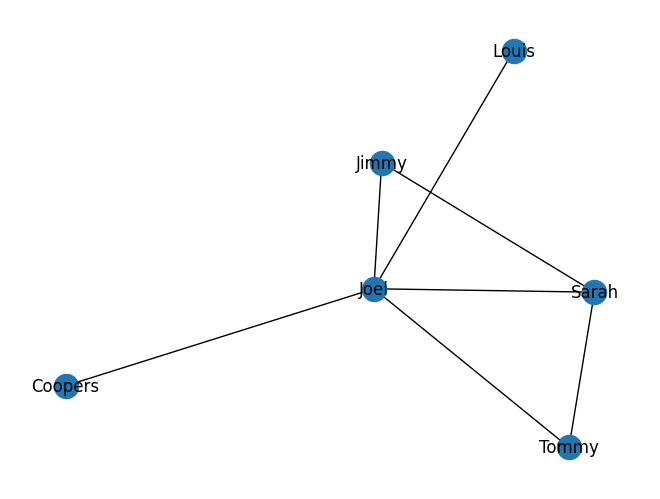

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Adicionando nós no gráfico usando Char_1 e Char_2
for node in set(dfRelations['Char_1']).union(set(dfRelations['Char_2'])):
    G.add_node(node)

# Adicione arestas ao gráfico
for idx, row in dfRelations.iterrows():
    G.add_edge(row['Char_1'], row['Char_2'])

nx.draw(G, with_labels=True)
plt.show()


Gerar um gráfico e analisar métricas de grau de centralidade e intermediação é uma forma eficaz de estudar as relações entre personagens e como elas mudam com o tempo. O grau de centralidade mede as conexões diretas entre personagens, enquanto a centralidade de intermediação mede o papel de um personagem como mediador ou intermediário. Essas métricas permitem visualizar a rede de relacionamentos entre personagens e identificar personagens-chave e seus papéis na narrativa. A análise dessas métricas pode fornecer informações valiosas sobre os relacionamentos entre os personagens e sua evolução ao longo da história.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Grau de Centralidade
deg_centrality = nx.degree_centrality(G)
sorted_deg_centrality = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
print("Grau de Centralidade:")
print(sorted_deg_centrality)

# grau de centralidade por intermediação (betweenness)
bet_centrality = nx.betweenness_centrality(G)
sorted_bet_centrality = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)
print("Betweenness:")
print(sorted_bet_centrality)


Grau de Centralidade:
[('Joel', 1.0), ('Sarah', 0.6000000000000001), ('Jimmy', 0.4), ('Tommy', 0.4), ('Louis', 0.2), ('Coopers', 0.2)]
Betweenness:
[('Joel', 0.75), ('Sarah', 0.05), ('Jimmy', 0.0), ('Tommy', 0.0), ('Louis', 0.0), ('Coopers', 0.0)]


# Analise final por meio do NER

Irei escolher dois capitulos (com o maior numero de entidades dentre os capítulos), e aplicar as técnicas NER apresentadas previamente para realizar a analise de como a relação entre os personagens e como ela muda com o passar do tempo.

In [ ]:
# Coletando personagens que tem dialogos no capítulo 2
charByChapter2 = get_characters_by_chapter(df, "THE QUARANTINE ZONE") #Capítulo 2
charByChapter2

array(['Clip', 'Joel', 'Tess', 'Loudspeaker', 'Man', 'Woman', 'Guard',
       'Guard 2', 'Infected', 'System', 'Terence', 'Malick', 'Goon',
       'Goon 2', 'Goon 3', 'Sentry', 'Sentry 2', 'Sentry 3', 'Sentry 4',
       'Robert', 'Voice', 'Marlene', 'Voice 2', 'Voice 1', 'Girl',
       'Ellie'], dtype=object)

In [ ]:
extract_named_entities_from_character(df, 'Joel', 'THE QUARANTINE ZONE', ['PERSON'])

,Char_1,index,Char_2,Labels
0,Joel,0,Tess,{PERSON}
1,Joel,1,Our Robert?,{PERSON}
2,Joel,2,Fireflies,{PERSON}
3,Joel,3,Jesus,{PERSON}
4,Joel,4,Bill,{PERSON}
5,Joel,5,Robert,{PERSON}
6,Joel,6,Jesus Christ,{PERSON}
7,Joel,7,Marlene,{PERSON}


In [ ]:
# Gerando dataframe com relações entre os personagens do capitulo 2
dfRelations2 = getCharacterRelationsByChapter(df, 'THE QUARANTINE ZONE', charByChapter2)
dfRelations2

,Char_1,index,Char_2,Labels
0,Joel,0,Tess,{PERSON}
1,Joel,1,Our Robert?,{PERSON}
2,Joel,2,Fireflies,{PERSON}
3,Joel,3,Jesus,{PERSON}
4,Joel,4,Bill,{PERSON}
5,Joel,5,Robert,{PERSON}
6,Joel,6,Jesus Christ,{PERSON}
7,Joel,7,Marlene,{PERSON}
8,Tess,0,Robert,{PERSON}
9,Tess,1,Joel,{PERSON}


In [ ]:
# Limpando dataframe
dfRelations2 = dfRelations2[~dfRelations2['Char_2'].isin(['Jesus', 'God', 'Jesus Christ', 'Our Robert?', 'Fireflies'])]
dfRelations2

,Char_1,index,Char_2,Labels
0,Joel,0,Tess,{PERSON}
4,Joel,4,Bill,{PERSON}
5,Joel,5,Robert,{PERSON}
7,Joel,7,Marlene,{PERSON}
8,Tess,0,Robert,{PERSON}
9,Tess,1,Joel,{PERSON}
10,Tess,2,Marlene,{PERSON}
11,Tess,3,Bill,{PERSON}
12,Tess,4,Plank,{PERSON}
13,Tess,5,Terence,{PERSON}


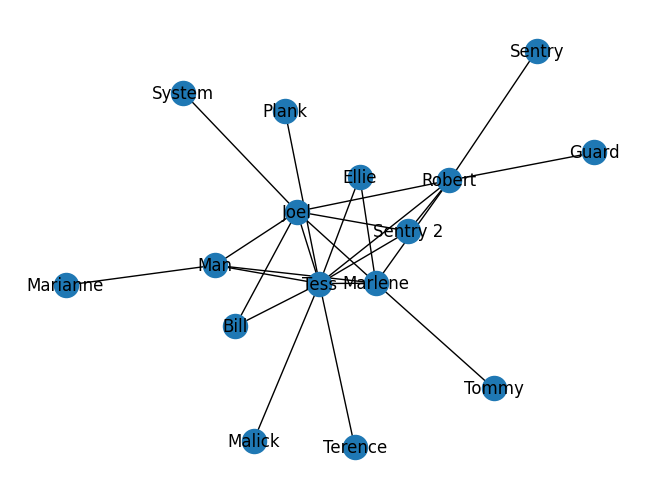

In [ ]:
# Gerando grafo das relações entre os personagens do capítulo 2
import networkx as nx
import matplotlib.pyplot as plt

G2 = nx.Graph()

# Adicionando nós no gráfico usando Char_1 e Char_2
for node in set(dfRelations2['Char_1']).union(set(dfRelations2['Char_2'])):
    G2.add_node(node)

# Adicionando arestas ao gráfico
for idx, row in dfRelations2.iterrows():
    G2.add_edge(row['Char_1'], row['Char_2'])

nx.draw(G2, with_labels=True)
plt.show()


In [ ]:
# Coletando personagens que tem dialogos no capítulo 4
charByChapter3 = get_characters_by_chapter(df, "BILL'S TOWN") #Capítulo 4
charByChapter3

array(['Joel', 'Ellie', 'Bill', 'Tess', '      thing'], dtype=object)

In [ ]:
extract_named_entities_from_character(df, 'Joel', "BILL'S TOWN", ['PERSON'])

,Char_1,index,Char_2,Labels
0,Joel,0,Bill,{PERSON}
1,Joel,1,Tommy,{PERSON}
2,Joel,2,Jesus,{PERSON}
3,Joel,3,Ellie,{PERSON}
4,Joel,4,Tess,{PERSON}
5,Joel,5,Frank,{PERSON}


In [ ]:
# Gerando dataframe com relações entre os personagens do capitulo 4
dfRelations3 = getCharacterRelationsByChapter(df, "BILL'S TOWN", charByChapter3)
dfRelations3

,Char_1,index,Char_2,Labels
0,Joel,0,Bill,{PERSON}
1,Joel,1,Tommy,{PERSON}
2,Joel,2,Jesus,{PERSON}
3,Joel,3,Ellie,{PERSON}
4,Joel,4,Tess,{PERSON}
5,Joel,5,Frank,{PERSON}
6,Ellie,0,Marlene,{PERSON}
7,Ellie,1,Angel Knives,{PERSON}
8,Ellie,2,Nelly,{PERSON}
9,Ellie,3,Bill,{PERSON}


In [ ]:
# Limpando dataframe
dfRelations3 = dfRelations3[~dfRelations3['Char_2'].isin(['Jesus', 'God', 'Jesus Christ', 'Our Robert?', 'Fireflies'])]
dfRelations3

,Char_1,index,Char_2,Labels
0,Joel,0,Bill,{PERSON}
1,Joel,1,Tommy,{PERSON}
3,Joel,3,Ellie,{PERSON}
4,Joel,4,Tess,{PERSON}
5,Joel,5,Frank,{PERSON}
6,Ellie,0,Marlene,{PERSON}
7,Ellie,1,Angel Knives,{PERSON}
8,Ellie,2,Nelly,{PERSON}
9,Ellie,3,Bill,{PERSON}
10,Ellie,4,Joel,{PERSON}


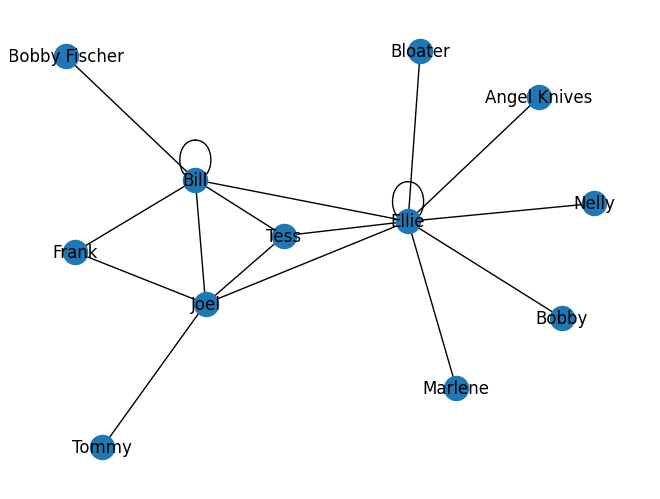

In [ ]:
# Gerando grafo das relações entre os personagens do capítulo 4
import networkx as nx
import matplotlib.pyplot as plt

G3 = nx.Graph()

# Adicionando nós no gráfico usando Char_1 e Char_2
for node in set(dfRelations3['Char_1']).union(set(dfRelations3['Char_2'])):
    G3.add_node(node)

# Adicionando arestas ao gráfico
for idx, row in dfRelations3.iterrows():
    G3.add_edge(row['Char_1'], row['Char_2'])

nx.draw(G3, with_labels=True)
plt.show()


A partir da computação de grau de centralidade e centralidade de intermediação, bem como a criação de grafos e gráficos, são técnicas poderosas que podem ser usadas para analisar as relações entre os personagens e como eles evoluem ao longo do tempo. Ao representar personagens como nós em um gráfico e suas interações como arestas, podemos aplicar ferramentas de análise de rede para estudar as interações mudam com o passar do tempo e identificar os personagens mais influentes em uma história.

In [ ]:
# Calcular grau de centralidade para ambos os grafos
dc1 = nx.degree_centrality(G2)
dc2 = nx.degree_centrality(G3)

# Calcular centralidade de intermediação para ambos os grafos
bc1 = nx.betweenness_centrality(G2)
bc2 = nx.betweenness_centrality(G3)

# Comparar as medidas de centralidade entre os dois gráficos
print(f'Grau de centralidade para o grafo 1: {dc1}')
print(f'Grau de centralidade para o grafo 2: {dc2}')
print(f'Centralidade de intermediação para o grafo 1: {bc1}')
print(f'Centralidade de intermediação para o grafo 2: {bc2}')

Grau de centralidade para o grafo 1: {'Tess': 0.6666666666666666, 'System': 0.06666666666666667, 'Man': 0.26666666666666666, 'Sentry': 0.06666666666666667, 'Sentry 2': 0.2, 'Malick': 0.06666666666666667, 'Guard': 0.06666666666666667, 'Robert': 0.4, 'Plank': 0.06666666666666667, 'Terence': 0.06666666666666667, 'Tommy': 0.06666666666666667, 'Joel': 0.4666666666666667, 'Marianne': 0.06666666666666667, 'Bill': 0.13333333333333333, 'Marlene': 0.4, 'Ellie': 0.13333333333333333}
Grau de centralidade para o grafo 2: {'Tess': 0.2727272727272727, 'Angel Knives': 0.09090909090909091, 'Tommy': 0.09090909090909091, 'Nelly': 0.09090909090909091, 'Bobby Fischer': 0.09090909090909091, 'Joel': 0.4545454545454546, 'Bloater': 0.09090909090909091, 'Bill': 0.6363636363636364, 'Marlene': 0.09090909090909091, 'Bobby': 0.09090909090909091, 'Frank': 0.18181818181818182, 'Ellie': 0.9090909090909092}
Centralidade de intermediação para o grafo 1: {'Tess': 0.4968253968253968, 'System': 0.0, 'Man': 0.13333333333333

In [ ]:
# Comparar os grafos/dicionarios/dataframes para coletar os personagens que aparecem em ambos para fazer uma analise mais relevante
common_keys = dc1.keys() & dc2.keys()
common_keys

{'Bill', 'Ellie', 'Joel', 'Marlene', 'Tess', 'Tommy'}

In [ ]:
# Filtrar apenas os dados dos personagens comuns aos dois grafos para o grafo do capítulo 2
filtered_dict1 = {key: value for key, value in dc1.items() if key in common_keys}
filtered_dict1

{'Tess': 0.6666666666666666,
 'Tommy': 0.06666666666666667,
 'Joel': 0.4666666666666667,
 'Bill': 0.13333333333333333,
 'Marlene': 0.4,
 'Ellie': 0.13333333333333333}

In [ ]:
# Filtrar apenas os dados dos personagens comuns aos dois grafos para o grafo do capítulo 4
filtered_dict2 = {key: value for key, value in dc2.items() if key in common_keys}
filtered_dict2

{'Tess': 0.2727272727272727,
 'Tommy': 0.09090909090909091,
 'Joel': 0.4545454545454546,
 'Bill': 0.6363636363636364,
 'Marlene': 0.09090909090909091,
 'Ellie': 0.9090909090909092}

In [ ]:
#Personagem mais influente de cada capítuilo segundo grau de centralidade sobre o grafo das relações das entidades reconhecidas no dialogos dos personagens
print(f'Personagem mais influente do capítulo 2 : {max(filtered_dict1, key=lambda k: filtered_dict1[k])}')
print(f'Personagem mais influente do capítulo 4 : {max(filtered_dict2, key=lambda k: filtered_dict2[k])}')

Personagem mais influente do capítulo 2 : Tess
Personagem mais influente do capítulo 4 : Ellie


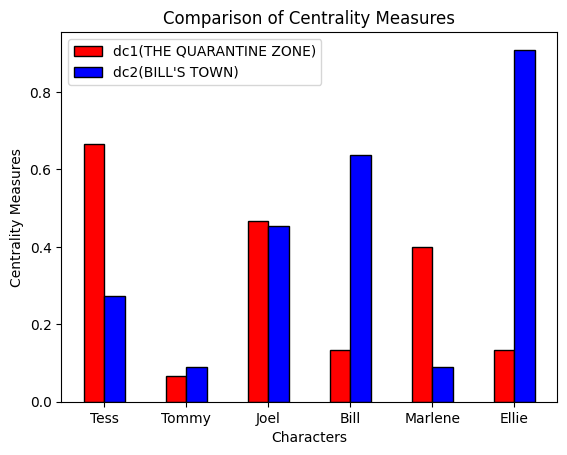

In [ ]:
import matplotlib.pyplot as plt

# Create x and y values for the first dictionary
x1 = list(filtered_dict1.keys())
y1 = list(filtered_dict1.values())

# Create x and y values for the second dictionary
x2 = list(filtered_dict2.keys())
y2 = list(filtered_dict2.values())

# Set the width of the bars
barWidth = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(x1))
r2 = [x + barWidth for x in r1]

# Plot the bars for the first dictionary
plt.bar(r1, y1, color='red', width=barWidth, edgecolor='black', label='dc1(THE QUARANTINE ZONE)')

# Plot the bars for the second dictionary
plt.bar(r2, y2, color='blue', width=barWidth, edgecolor='black', label="dc2(BILL'S TOWN)")

# Set the x-tick labels
plt.xticks([r + barWidth/2 for r in range(len(x1))], x1)

# Add labels to the x-axis and y-axis
plt.xlabel('Characters')
plt.ylabel('Centrality Measures')

# Add a title to the graph
plt.title('Comparison of Centrality Measures')

# Add a legend to the graph
plt.legend()

# Show the graph
plt.show()


Para analisar as relações entre os personagens do jogo presentes no dicionário e como eles mudaram ao longo do tempo, podemos comparar os valores das medidas de centralidade entre os dois dicionários.

É possivel observar que Tess começa com a centralidade mais alta do capítulo 2, mas cai para menos da metade em relação ao segundo no quarto capítulo. Isso talvez se deva pois, Tess desempenha um papel importante na história, acompanhando Joel em sua jornada para contrabandear Ellie para fora da zona de quarentena. Sua forte presença e habilidades de liderança podem ter contribuído para sua alta centralidade na história naquele ponto.

No capítulo 4, no entanto, Tess não está mais presente na história, pois ela é morta no início. Isso pode ter levado a uma diminuição em sua pontuação de centralidade, pois ela não é mais um personagem significativo na história.

Joel como sendo o protagonista principal do jogo se mostra apresenta praticamente constante, sem sofrer grandes auterações nos seus dialogos e como consequencia na sua participação e importancia para história também.

E por fim, vemos que a centralidade de Ellie aumentou consideravelmente do Capítulo 2 para o Capítulo 4.Isso pode ser atribuído ao relacionamento crescente entre Ellie e Joel enquanto eles continuam sua jornada juntos. No Capítulo 2, Ellie ainda é vista como uma criança e suas interações com outros personagens são limitadas. No entanto, à medida que a história avança e Ellie se torna mais integrante da trama, sua centralidade na rede social de personagens aumenta. Além disso, no Capítulo 4, Ellie passa um tempo significativo com Bill, que tem uma alta pontuação de centralidade naquele capítulo.

Isso sugere que as relações entre os personagens mudaram ao longo do tempo, com diferentes personagens se tornando mais ou menos centrais para a história em diferentes capítulos. Seria interessante analisar os diálogos e acontecimentos de cada capítulo para entender porque certos personagens se tornaram mais ou menos importantes em cada capítulo.

## Conclusão
Em conclusão, nossa análise dos diálogos de The Last of Us usando três técnicas de processamento de linguagem natural - análise de sentimentos, modelagem de tópicos e reconhecimento de entidade nomeada - forneceu informações valiosas sobre os personagens, histórias e impacto emocional geral do jogo. Por meio da análise de sentimentos, conseguimos identificar as emoções dominantes retratadas nos diálogos e como elas mudaram ao longo da narrativa do jogo. A modelagem de tópicos nos permitiu descobrir os principais temas e tópicos que emergiram dos diálogos, revelando uma complexa interação entre sobrevivência, perda e esperança. Finalmente, o reconhecimento de entidades nomeadas nos permitiu estudar as relações entre os personagens do jogo e como eles mudaram ao longo do tempo.

No geral, este projeto demonstrou o poder e a versatilidade das técnicas de processamento de linguagem natural na análise e compreensão de narrativas complexas em videogames. Com mais pesquisa e desenvolvimento, essas técnicas podem ser aplicadas a outras formas de mídia, como filmes, livros e programas de televisão, proporcionando uma compreensão mais profunda de seu conteúdo e impacto no público.